In [1]:
import pandas as pd
import janitor
import geopandas as gpd

/usr/local/python/3.12.1/lib/python3.12/site-packages/geopandas/_compat.py:7: DeprecationWarning: The 'shapely.geos' module is deprecated, and will be removed in a future version. All attributes of 'shapely.geos' are available directly from the top-level 'shapely' namespace (since shapely 2.0.0).
  import shapely.geos


In [2]:
hoteis_df = pd.read_excel('hoteis_tratados.xlsx').clean_names()

In [3]:
hoteis_unicos = hoteis_df['hotel'].unique().tolist()
hoteis_unicos

['Atlante_Plaza',
 'Beach_Class_Convention',
 'Bianca_Praia_Hotel',
 'Bugan',
 'Duble_Hotel',
 'El_Aram_Beach',
 'Fity_Hotel',
 'Grand_Mercure',
 'Hotel_Barramares',
 'Hotel_Boa_Viagem_Aeroporto',
 'Hotel_Enseada_Boa_Viagem',
 'Hotel_Euro_Suite',
 'Hotel_Golden_Park',
 'Hotel_Jangadeiro',
 'Hotel_Nacional_Inn',
 'Hotel_Uzi_Mar',
 'Hotel_Villa_Mar',
 'Hote_Saveiro',
 'Ibis_Recife_Aeroporto',
 'Marante_Plaza',
 'Mar_Hotel_Conventions',
 'Mercure_Recife',
 'Park_Hotel',
 'Radisson_Recife',
 'Rede_Andrade_LG_Inn',
 'Rede_Andrade_Navegantes',
 'Rede_Andrade_Onda_mar',
 'Suites_Residence',
 'Transamerica_Fit_Recife',
 'Vela_Branca']

In [ ]:
# salvar os hoteis únicos em um arquivo Excel
# pd.DataFrame({'hotel': hoteis_unicos}).to_excel('hoteis_coord.xlsx', index=False)

# Coletar as coordenadas de cada hotel:

## Abrir Google Maps (https://www.google.com/maps)

## Digitar o nome do Hotel na Caixa de busca
![Google Maps](Imagem1.png)

## Clicar no nome do Hotel com o botaõ direito do mouse
![Google Maps](Imagem2.png)

## Basta clicar nas coordenadas que já copia para a área de transferência
![Google Maps](Imagem3.png)

## Depois você cola em `hoteis_coord.xlsx`
![Google Maps](Imagem4.png)

# Ler o arquivo Excel com os hoteis únicos

In [4]:

hoteis_unicos_df = pd.read_excel('hoteis_coord.xlsx').clean_names()
hoteis_unicos_df

,hotel,coords
0,Atlante_Plaza,"-8.136203379265334, -34.90138595924756"
1,Beach_Class_Convention,"-8.113060663182512, -34.89791227884781"
2,Bianca_Praia_Hotel,"-8.116538871476644, -34.89485987458913"
3,Bugan,"-8.129007192286256, -34.90062504646503"
4,Duble_Hotel,"-8.113965413308687, -34.892547553859856"
5,El_Aram_Beach,"-8.128197012930327, -34.89885518084642"
6,Fity_Hotel,"-8.119903487717643, -34.89711670413616"
7,Grand_Mercure,"-8.124674198129473, -34.89636857090203"
8,Hotel_Barramares,"-8.155681905054847, -34.90968353968906"
9,Hotel_Boa_Viagem_Aeroporto,"-8.131178219212332, -34.902982946464896"


# Separar a coluna `coords` em duas colunas `latitude` e `longitude`

In [5]:
hoteis_unicos_df[['latitude','longitude']] = hoteis_unicos_df['coords'].str.split(',', expand= True)
hoteis_unicos_df = hoteis_unicos_df.drop(columns = ['coords'])
hoteis_unicos_df

,hotel,latitude,longitude
0,Atlante_Plaza,-8.136203379265334,-34.90138595924756
1,Beach_Class_Convention,-8.113060663182512,-34.89791227884781
2,Bianca_Praia_Hotel,-8.116538871476644,-34.89485987458913
3,Bugan,-8.129007192286256,-34.90062504646503
4,Duble_Hotel,-8.113965413308687,-34.892547553859856
5,El_Aram_Beach,-8.128197012930327,-34.89885518084642
6,Fity_Hotel,-8.119903487717643,-34.89711670413616
7,Grand_Mercure,-8.124674198129473,-34.89636857090203
8,Hotel_Barramares,-8.155681905054847,-34.90968353968906
9,Hotel_Boa_Viagem_Aeroporto,-8.131178219212332,-34.902982946464896


# converter para GeoDataFrame


In [6]:

hoteis_unicos_gdf = gpd.GeoDataFrame(hoteis_unicos_df, 
                           geometry = gpd.points_from_xy(hoteis_unicos_df['longitude'], hoteis_unicos_df['latitude']), 
                           crs='EPSG:31985')

hoteis_unicos_gdf

,hotel,latitude,longitude,geometry
0,Atlante_Plaza,-8.136203379265334,-34.90138595924756,POINT (-34.901 -8.136)
1,Beach_Class_Convention,-8.113060663182512,-34.89791227884781,POINT (-34.898 -8.113)
2,Bianca_Praia_Hotel,-8.116538871476644,-34.89485987458913,POINT (-34.895 -8.117)
3,Bugan,-8.129007192286256,-34.90062504646503,POINT (-34.901 -8.129)
4,Duble_Hotel,-8.113965413308687,-34.892547553859856,POINT (-34.893 -8.114)
5,El_Aram_Beach,-8.128197012930327,-34.89885518084642,POINT (-34.899 -8.128)
6,Fity_Hotel,-8.119903487717643,-34.89711670413616,POINT (-34.897 -8.12)
7,Grand_Mercure,-8.124674198129473,-34.89636857090203,POINT (-34.896 -8.125)
8,Hotel_Barramares,-8.155681905054847,-34.90968353968906,POINT (-34.91 -8.156)
9,Hotel_Boa_Viagem_Aeroporto,-8.131178219212332,-34.902982946464896,POINT (-34.903 -8.131)


# carregar o arquivo shapefile

Atenção: O shapefile é composto por vários arquivos, como .shp, .shx, .dbf, etc. Embora aparentemente o python só leia o arquivo `.shp`, na prática ele precisa de todos os demais. Portanto, para o bom funcionamento do processo, vc precisa manter todos os arquivos na mesma pasta.

In [7]:

recife_shape = gpd.read_file('recife.shp')

In [8]:
recife_shape

,code_mn,name_mn,cod_stt,abbrv_s,geometry
0,2611606.0,Recife,26,PE,"POLYGON ((-34.96842 -8.02256, -34.96646 -8.022..."


# plotar o GeoDataFrame

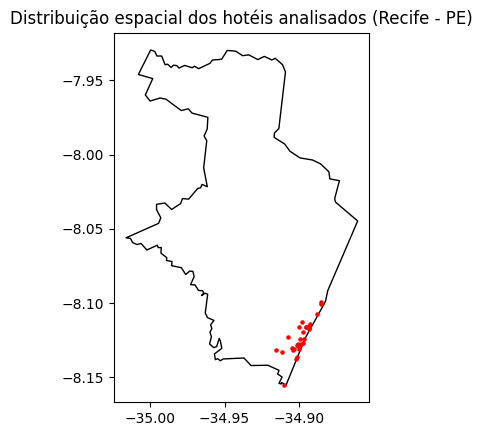

In [9]:
import matplotlib.pyplot as plt

recife_shape.plot( color='white', edgecolor='black')
hoteis_unicos_gdf.plot(ax=plt.gca(), color='red', markersize=5)

plt.title('Distribuição espacial dos hotéis analisados (Recife - PE)')
plt.show()